In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Parquet files from the 2024 folder
a = pd.read_parquet('2024/ammonium_2024.parquet')
n = pd.read_parquet('2024/nitrate_2024.parquet')
oa = pd.read_parquet('2024/oxygen_a_2024.parquet')
ob = pd.read_parquet('2024/oxygen_b_2024.parquet')
p = pd.read_parquet('2024/phosphate_2024.parquet')
ifd = pd.read_parquet('2024/Influent_Flow_2023.parquet')

# Display the first few rows of one of the DataFrames to verify
print(a.head())

        historianTagnummer hstWaarde     datumBeginMeting  \
0  EDE_B121069913_K600.MTW      1.31  2023-01-01 00:00:00   
1  EDE_B121069913_K600.MTW     1.251  2023-01-01 00:01:00   
2  EDE_B121069913_K600.MTW     1.182  2023-01-01 00:02:00   
3  EDE_B121069913_K600.MTW     1.181  2023-01-01 00:03:00   
4  EDE_B121069913_K600.MTW     1.179  2023-01-01 00:04:00   

      datumEindeMeting waardebewerkingsmethodeCode  
0  2023-01-01 00:01:00                              
1  2023-01-01 00:02:00                              
2  2023-01-01 00:03:00                              
3  2023-01-01 00:04:00                              
4  2023-01-01 00:05:00                              


In [2]:


def format_datetime_columns(df, date_cols=['datumBeginMeting', 'datumEindeMeting']):
    """
    Convert specified columns in df to format 'D-M-YYYY HH:MM', dropping leading zeros 
    in day and month. Modifies df in place.
    """
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')
        df[col] = df[col].apply(lambda ts: 
            f"{ts.day}-{ts.month}-{ts.year} {ts.hour:02d}:{ts.minute:02d}"
            if pd.notnull(ts) else None
        )
    return df

# Apply formatting and drop columns if they exist
for df in [a, n, oa, ob, p, ifd]:
    format_datetime_columns(df)
    for col in ['historianTagnummer', 'waardebewerkingsmethodeCode']:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)

# Display the first few rows of one DataFrame to verify
print(a.head())

  hstWaarde datumBeginMeting datumEindeMeting
0      1.31   1-1-2023 00:00   1-1-2023 00:01
1     1.251   1-1-2023 00:01   1-1-2023 00:02
2     1.182   1-1-2023 00:02   1-1-2023 00:03
3     1.181   1-1-2023 00:03   1-1-2023 00:04
4     1.179   1-1-2023 00:04   1-1-2023 00:05


In [3]:
# rename columns
a.rename(columns={'hstWaarde': 'Ammonium mg/L'}, inplace=True)
n.rename(columns={'hstWaarde': 'Nitrate mg/L'}, inplace=True)
p.rename(columns={'hstWaarde': 'Phosphate mgP/L'}, inplace=True)
oa.rename(columns={'hstWaarde': 'Oxygen_A mg/L'}, inplace=True)
ob.rename(columns={'hstWaarde': 'Oxygen_B mg/L'}, inplace=True)
ifd.rename(columns={'hstWaarde': 'influentFlow'}, inplace=True)

In [4]:
ifd

,influentFlow,datumBeginMeting,datumEindeMeting
0,3330.199,1-1-2023 00:00,1-1-2023 00:01
1,3288.798,1-1-2023 00:01,1-1-2023 00:02
2,3260.545,1-1-2023 00:02,1-1-2023 00:03
3,3253.279,1-1-2023 00:03,1-1-2023 00:04
4,3263.276,1-1-2023 00:04,1-1-2023 00:05
...,...,...,...
44635,627.162,31-12-2023 23:55,31-12-2023 23:56
44636,1433.649,31-12-2023 23:56,31-12-2023 23:57
44637,1637.519,31-12-2023 23:57,31-12-2023 23:58
44638,1933.898,31-12-2023 23:58,31-12-2023 23:59


In [5]:
# The datumEindeMeting column in each DataFrame is renamed to include a suffix that identifies the DataFrame:

a = a.rename(columns={'datumEindeMeting': 'datumEindeMeting_A'})
n = n.rename(columns={'datumEindeMeting': 'datumEindeMeting_N'})
p = p.rename(columns={'datumEindeMeting': 'datumEindeMeting_P'})
oa = oa.rename(columns={'datumEindeMeting': 'datumEindeMeting_Oa'})
ob = ob.rename(columns={'datumEindeMeting': 'datumEindeMeting_Ob'})

# Duplicates are removed based on the newly renamed datumEindeMeting columns in each DataFrame. This ensures that each timestamp is unique within each DataFrame.
a = a.drop_duplicates(subset='datumEindeMeting_A')
n = n.drop_duplicates(subset='datumEindeMeting_N')
p = p.drop_duplicates(subset='datumEindeMeting_P')
oa = oa.drop_duplicates(subset='datumEindeMeting_Oa')
ob = ob.drop_duplicates(subset='datumEindeMeting_Ob')

In [6]:
# merges the ifd DataFrame with each of the other DataFrames (a, n, p, oa, ob) based on the datumEindeMeting column.

ifd = ifd.merge(a[['datumEindeMeting_A', 'Ammonium mg/L']], left_on='datumEindeMeting', right_on='datumEindeMeting_A', how='left')
ifd = ifd.merge(n[['datumEindeMeting_N', 'Nitrate mg/L']], left_on='datumEindeMeting', right_on='datumEindeMeting_N', how='left')
ifd = ifd.merge(p[['datumEindeMeting_P', 'Phosphate mgP/L']], left_on='datumEindeMeting', right_on='datumEindeMeting_P', how='left')
ifd = ifd.merge(oa[['datumEindeMeting_Oa', 'Oxygen_A mg/L']], left_on='datumEindeMeting', right_on='datumEindeMeting_Oa', how='left')
ifd = ifd.merge(ob[['datumEindeMeting_Ob', 'Oxygen_B mg/L']], left_on='datumEindeMeting', right_on='datumEindeMeting_Ob', how='left')


In [7]:

ifd

,influentFlow,datumBeginMeting,datumEindeMeting,datumEindeMeting_A,Ammonium mg/L,datumEindeMeting_N,Nitrate mg/L,datumEindeMeting_P,Phosphate mgP/L,datumEindeMeting_Oa,Oxygen_A mg/L,datumEindeMeting_Ob,Oxygen_B mg/L
0,3330.199,1-1-2023 00:00,1-1-2023 00:01,1-1-2023 00:01,1.31,1-1-2023 00:01,4.73,1-1-2023 00:01,0.001,1-1-2023 00:01,1.663,1-1-2023 00:01,0.777
1,3288.798,1-1-2023 00:01,1-1-2023 00:02,1-1-2023 00:02,1.251,1-1-2023 00:02,4.73,1-1-2023 00:02,0.001,1-1-2023 00:02,1.789,1-1-2023 00:02,0.982
2,3260.545,1-1-2023 00:02,1-1-2023 00:03,1-1-2023 00:03,1.182,1-1-2023 00:03,4.73,1-1-2023 00:03,0,1-1-2023 00:03,2.105,1-1-2023 00:03,1.189
3,3253.279,1-1-2023 00:03,1-1-2023 00:04,1-1-2023 00:04,1.181,1-1-2023 00:04,4.675,1-1-2023 00:04,0,1-1-2023 00:04,2.271,1-1-2023 00:04,1.266
4,3263.276,1-1-2023 00:04,1-1-2023 00:05,1-1-2023 00:05,1.179,1-1-2023 00:05,4.605,1-1-2023 00:05,0,1-1-2023 00:05,2.168,1-1-2023 00:05,1.403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525234,627.162,31-12-2023 23:55,31-12-2023 23:56,31-12-2023 23:56,1.688,31-12-2023 23:56,8.916,31-12-2023 23:56,0.16,31-12-2023 23:56,1.635,31-12-2023 23:56,0.596
525235,1433.649,31-12-2023 23:56,31-12-2023 23:57,31-12-2023 23:57,1.665,31-12-2023 23:57,9.059,31-12-2023 23:57,0.139,31-12-2023 23:57,1.841,31-12-2023 23:57,0.726
525236,1637.519,31-12-2023 23:57,31-12-2023 23:58,31-12-2023 23:58,1.642,31-12-2023 23:58,9.073,31-12-2023 23:58,0.097,31-12-2023 23:58,1.816,31-12-2023 23:58,0.843
525237,1933.898,31-12-2023 23:58,31-12-2023 23:59,31-12-2023 23:59,1.619,31-12-2023 23:59,9.088,31-12-2023 23:59,0.096,31-12-2023 23:59,1.812,31-12-2023 23:59,0.88


In [8]:
 #removes the extra datumEindeMeting columns that were added during the merge process.
ifd = ifd.drop(columns=['datumEindeMeting_A', 'datumEindeMeting_N', 'datumEindeMeting_P', 'datumEindeMeting_Oa', 'datumEindeMeting_Ob'])

In [9]:
ifd = ifd.drop_duplicates()

ifd.reset_index(drop=True, inplace=True)

In [10]:

ifd

,influentFlow,datumBeginMeting,datumEindeMeting,Ammonium mg/L,Nitrate mg/L,Phosphate mgP/L,Oxygen_A mg/L,Oxygen_B mg/L
0,3330.199,1-1-2023 00:00,1-1-2023 00:01,1.31,4.73,0.001,1.663,0.777
1,3288.798,1-1-2023 00:01,1-1-2023 00:02,1.251,4.73,0.001,1.789,0.982
2,3260.545,1-1-2023 00:02,1-1-2023 00:03,1.182,4.73,0,2.105,1.189
3,3253.279,1-1-2023 00:03,1-1-2023 00:04,1.181,4.675,0,2.271,1.266
4,3263.276,1-1-2023 00:04,1-1-2023 00:05,1.179,4.605,0,2.168,1.403
...,...,...,...,...,...,...,...,...
525234,627.162,31-12-2023 23:55,31-12-2023 23:56,1.688,8.916,0.16,1.635,0.596
525235,1433.649,31-12-2023 23:56,31-12-2023 23:57,1.665,9.059,0.139,1.841,0.726
525236,1637.519,31-12-2023 23:57,31-12-2023 23:58,1.642,9.073,0.097,1.816,0.843
525237,1933.898,31-12-2023 23:58,31-12-2023 23:59,1.619,9.088,0.096,1.812,0.88


In [11]:
 for df in [ifd]:
       print(df.isnull().sum())  # Check for missing values
       df.fillna(method='ffill', inplace=True)  # Example: Forward fill

influentFlow          0
datumBeginMeting      0
datumEindeMeting      0
Ammonium mg/L       192
Nitrate mg/L        192
Phosphate mgP/L     192
Oxygen_A mg/L       192
Oxygen_B mg/L       192
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_27528\370906080.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example: Forward fill


In [18]:
print(ifd[['Ammonium mg/L', 'Nitrate mg/L', 'Phosphate mgP/L', 'Oxygen_A mg/L', 'Oxygen_B mg/L']].head())

   Ammonium mg/L  Nitrate mg/L  Phosphate mgP/L  Oxygen_A mg/L  Oxygen_B mg/L
0          1.310         4.730            0.001          1.663          0.777
1          1.251         4.730            0.001          1.789          0.982
2          1.182         4.730            0.000          2.105          1.189
3          1.181         4.675            0.000          2.271          1.266
4          1.179         4.605            0.000          2.168          1.403


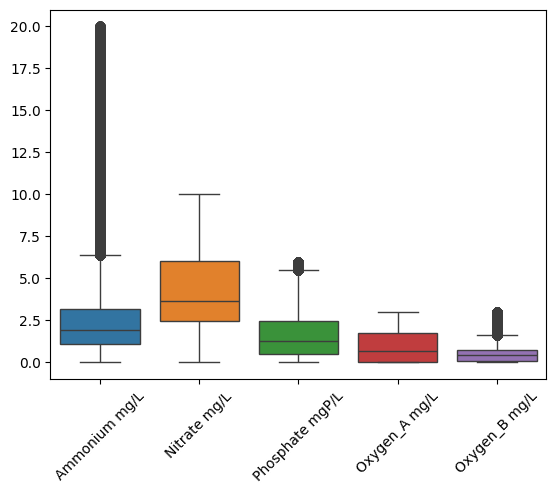

In [19]:
     #check for outliers with boxplot
     sns.boxplot(data=ifd[['Ammonium mg/L', 'Nitrate mg/L', 'Phosphate mgP/L', 'Oxygen_A mg/L', 'Oxygen_B mg/L']])
     plt.xticks(rotation=45)
     plt.show()

In [21]:
# Mean imputation for columns with fewer outliers(The mean is sensitive to extreme values)
ifd['Oxygen_A mg/L'] = ifd['Oxygen_A mg/L'].fillna(ifd['Oxygen_A mg/L'].mean())
ifd['Nitrate mg/L'] = ifd['Nitrate mg/L'].fillna(ifd['Nitrate mg/L'].mean())

# Median imputation for columns with outliers(The median is robust to outliers, )
for col in ['Ammonium mg/L','Phosphate mgP/L', 'Oxygen_B mg/L']:
    ifd[col] = ifd[col].fillna(ifd[col].median())

In [23]:
 for df in [ ifd]:
       print(df.isnull().sum())  # Check for missing values
       df.fillna(method='ffill', inplace=True)  # Example: Forward fill

influentFlow        0
datumBeginMeting    0
datumEindeMeting    0
Ammonium mg/L       0
Nitrate mg/L        0
Phosphate mgP/L     0
Oxygen_A mg/L       0
Oxygen_B mg/L       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_27528\986004140.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example: Forward fill


In [24]:
#checks for negative values
for df in [a, n, oa, ob, p, ifd]:
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include='number').columns
    # Check for negative values in numeric columns
    print((df[numeric_cols] < 0).sum())

Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Ammonium mg/L      0
Nitrate mg/L       0
Phosphate mgP/L    0
Oxygen_A mg/L      0
Oxygen_B mg/L      0
dtype: int64
